<a href="https://colab.research.google.com/github/luc-perso/covid-19-xRay/blob/main/codes_ByAmani/Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/MyDrive/data_equalize.zip' -d '/content/'

replace /content/data_equalize/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: All


In [ ]:

import numpy as np
from sklearn import metrics 
from keras.layers.core import Dense, Flatten, Dropout
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model= Sequential()
model.add(ZeroPadding2D((1,1), input_shape=(128,128,1)))
model.add(Convolution2D (64,1,1,activation= "relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D (64,1,1,activation= "relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D (1024,1,1,activation= "relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D (1024,1,1,activation= "relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D (512,1,1,activation= "relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D (512,1,1,activation= "relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D (512,1,1,activation= "relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

sgd=SGD(lr=0.1, decay=1e-6, momentum= 0.9, nesterov=True)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics= ["accuracy"])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 130, 130, 1)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 130, 130, 64)      128       
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 132, 132, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 132, 132, 64)      4160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 64)       0         
 )                                                               
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
plot_model(model)
fig = plt.gcf()
fig.savefig('model_Sequential_.pdf')

In [ ]:
lungdir ='/content/data_equalize/Lung Segmentation Data'
infectdir ='/content/data_equalize/Infection Segmentation Data'

train= '/Train'
test= '/Test'
val= '/Val'

covid= '/COVID-19/images'
noncovid='/Non-COVID/images'
normal= '/Normal/images'


In [ ]:
# train from scratch
train_datagen= image.ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True
    
)

test_dataset= image.ImageDataGenerator(
    rescale= 1./255)

train_generator= train_datagen.flow_from_directory(
    
    lungdir + train,
   
    target_size= (128,128),
    batch_size=32,
    class_mode="categorical",
    color_mode='grayscale'
)

test_generator= test_dataset.flow_from_directory(
    lungdir+ test,
    target_size= (128,128),
    batch_size=32,
    class_mode="categorical",
    color_mode='grayscale'
)

hist= model.fit_generator(
    train_generator,
    steps_per_epoch= 1310//32,
    epochs=5,
    validation_data=test_generator,
    validation_steps=334//32
)

#print("train evaluation",model.evaluate(train_generator))
#print("test evaluation",model.evaluate_generator(test_generator))
#print(train_generator.class_indices)

Found 21715 images belonging to 3 classes.
Found 6787 images belonging to 3 classes.
Epoch 1/5


<ipython-input-14-7c01e0288eb1>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist= model.fit_generator(


40/40 [==============================] - 1170s 29s/step - loss: 1.1122 - accuracy: 0.3344 - val_loss: 1.0941 - val_accuracy: 0.4062
Epoch 2/5
40/40 [==============================] - 1167s 29s/step - loss: 1.1037 - accuracy: 0.3425 - val_loss: 1.0989 - val_accuracy: 0.3344
Epoch 3/5
40/40 [==============================] - 1208s 30s/step - loss: 1.1011 - accuracy: 0.3594 - val_loss: 1.1036 - val_accuracy: 0.3250
Epoch 4/5
40/40 [==============================] - 1162s 29s/step - loss: 1.1034 - accuracy: 0.3344 - val_loss: 1.1035 - val_accuracy: 0.3219
Epoch 5/5
40/40 [==============================] - 1166s 29s/step - loss: 1.1020 - accuracy: 0.3492 - val_loss: 1.1096 - val_accuracy: 0.3063


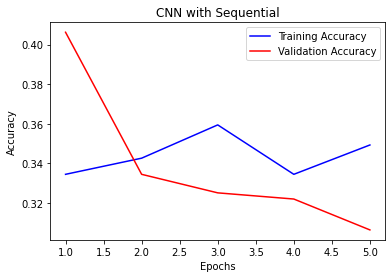

In [ ]:
#@title Default title text
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')


ax= plt.plot(np.arange(1 , 6, 1),
         hist.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

ax+ plt.plot(np.arange(1 , 6, 1),
         hist.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')


plt.title('CNN with Sequential')
plt.legend()
fig = plt.gcf()
fig.savefig('fig_Sequential.pdf')
plt.show()

